In [313]:
import pandas as pd
import matplotlib.pyplot as plt

In [314]:
data = pd.read_excel('ERIC_DATA.xlsx') # Load the data from the first sheet and display the first few rows to understand its structure

data.head()

,Month,Non performing loan ratio,Inflation,Treasury bill rate (91-day),Interbank weighted average rate,Interbank Exchange Rate US Dollar (USD),Forex Bureau Exchange Rate US Dollar (USD),Trading Volume,GSE Comp Index
0,2024M06,24.1,20.9,24.9,28.8,14.33,15.27,39.75,3829.61
1,2024M05,24.5,22.8,25.2,28.7,13.78,14.69,255.72,3753.69
2,2024M04,25.7,23.1,25.7,28.7,13.04,13.59,34.96,3687.09
3,2024M03,26.7,25.0,26.4,28.5,12.67,13.20,208.73,3456.20
4,2024M02,24.6,25.8,27.9,29.2,12.23,12.59,14.43,3227.85


In [315]:
#convert data type to float
data['GSE Comp Index'] = pd.to_numeric(data['GSE Comp Index'], errors='coerce')

# Convert 'Month' to datetime format for better analysis
data['Month'] = pd.to_datetime(data['Month'], format='%YM%m')

# fill missing values withe mean
data['GSE Comp Index'].fillna(data['GSE Comp Index'].mean(), inplace=True)

C:\Users\dell XPS 15\AppData\Local\Temp\ipykernel_17896\3552781470.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GSE Comp Index'].fillna(data['GSE Comp Index'].mean(), inplace=True)


In [316]:
data.isnull().sum()

Month                                         0
Non performing loan ratio                     0
Inflation                                     0
Treasury bill rate (91-day)                   0
Interbank weighted average rate               0
Interbank Exchange Rate US Dollar (USD)       0
Forex Bureau Exchange Rate US Dollar (USD)    0
Trading Volume                                0
GSE Comp Index                                0
dtype: int64

In [317]:
# Basic descriptive statistics to understand the distribution of the data
data.describe()

,Month,Non performing loan ratio,Inflation,Treasury bill rate (91-day),Interbank weighted average rate,Interbank Exchange Rate US Dollar (USD),Forex Bureau Exchange Rate US Dollar (USD),Trading Volume,GSE Comp Index
count,102,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,2020-03-16 18:35:17.647058944,18.099020,17.478431,18.250000,19.794118,6.501373,6.843039,127.439706,2475.165686
min,2016-01-01 00:00:00,13.600000,5.800000,12.100000,12.600000,3.810000,3.850000,1.550000,1575.710000
25%,2018-02-08 00:00:00,15.500000,8.125000,13.400000,15.200000,4.420000,4.555000,10.997500,2009.870000
50%,2020-03-16 12:00:00,18.000000,12.150000,14.700000,18.350000,5.535000,5.745000,27.845000,2460.685000
75%,2022-04-23 12:00:00,20.000000,23.025000,22.800000,25.475000,7.125000,7.800000,49.415000,2803.357500
max,2024-06-01 00:00:00,26.700000,54.100000,35.700000,30.200000,14.330000,15.270000,4772.000000,3829.610000
std,NaN,3.063567,12.471271,6.455418,5.602366,2.829144,3.133935,583.595106,515.929729


In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Month                                       102 non-null    datetime64[ns]
 1   Non performing loan ratio                   102 non-null    float64       
 2   Inflation                                   102 non-null    float64       
 3   Treasury bill rate (91-day)                 102 non-null    float64       
 4   Interbank weighted average rate             102 non-null    float64       
 5   Interbank Exchange Rate US Dollar (USD)     102 non-null    float64       
 6   Forex Bureau Exchange Rate US Dollar (USD)  102 non-null    float64       
 7   Trading Volume                              102 non-null    float64       
 8   GSE Comp Index                              102 non-null    float64       
dtypes: datetime

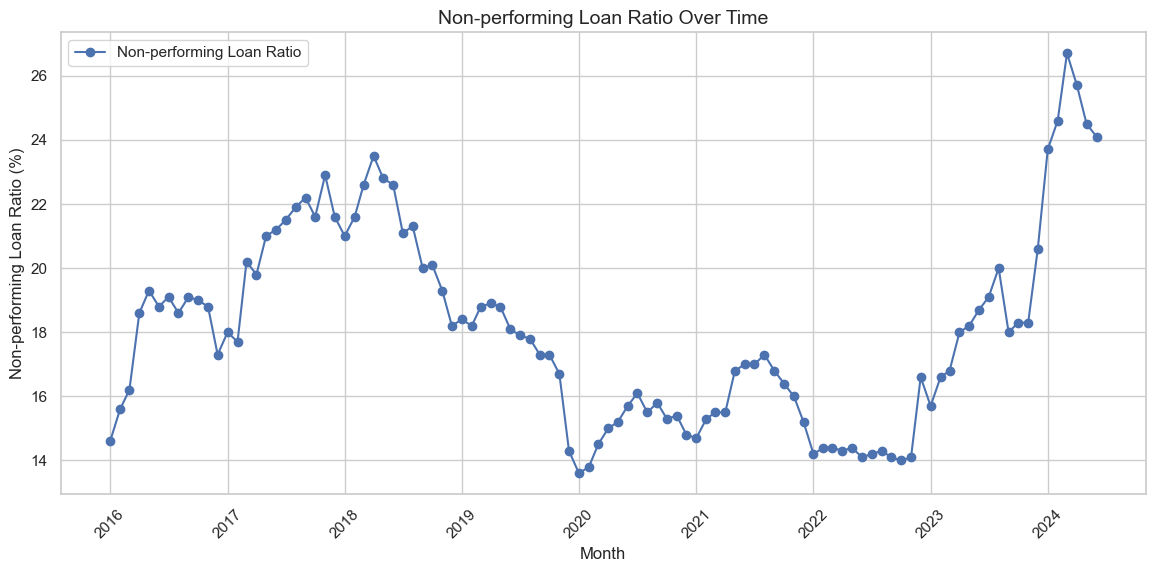

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a plotting style
sns.set(style="whitegrid")

# Plot the non-performing loan ratio over time
plt.figure(figsize=(14, 6))
plt.plot(data['Month'], data['Non performing loan ratio'], marker='o', color='b', label='Non-performing Loan Ratio')
plt.xticks(rotation=45)
plt.title('Non-performing Loan Ratio Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Non-performing Loan Ratio (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

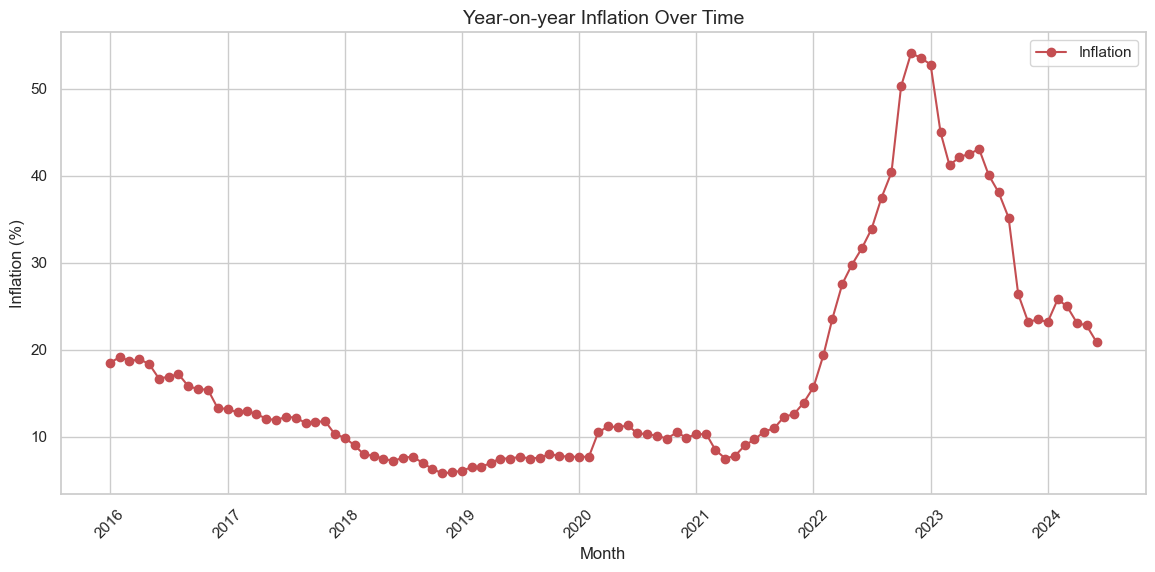

In [320]:
# Plot Year-on-year inflation over time
plt.figure(figsize=(14, 6))
plt.plot(data['Month'], data['Inflation'], marker='o', color='r', label='Inflation')
plt.xticks(rotation=45)
plt.title('Year-on-year Inflation Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Inflation (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

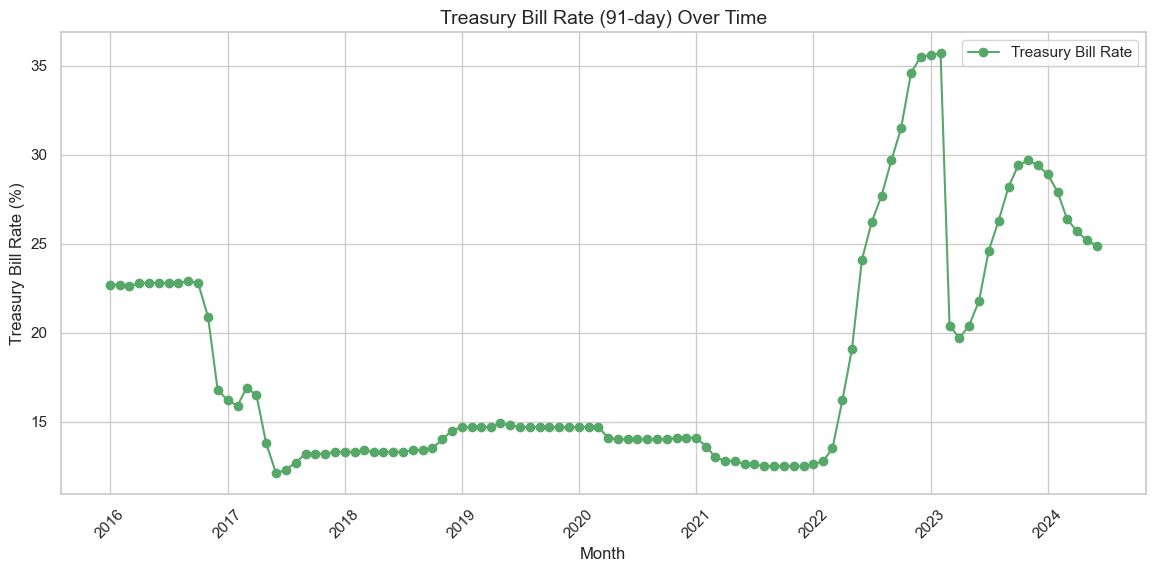

In [321]:
# Plot Treasury bill rate over time
plt.figure(figsize=(14, 6))
plt.plot(data['Month'], data['Treasury bill rate (91-day)'], marker='o', color='g', label='Treasury Bill Rate')
plt.xticks(rotation=45)
plt.title('Treasury Bill Rate (91-day) Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Treasury Bill Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

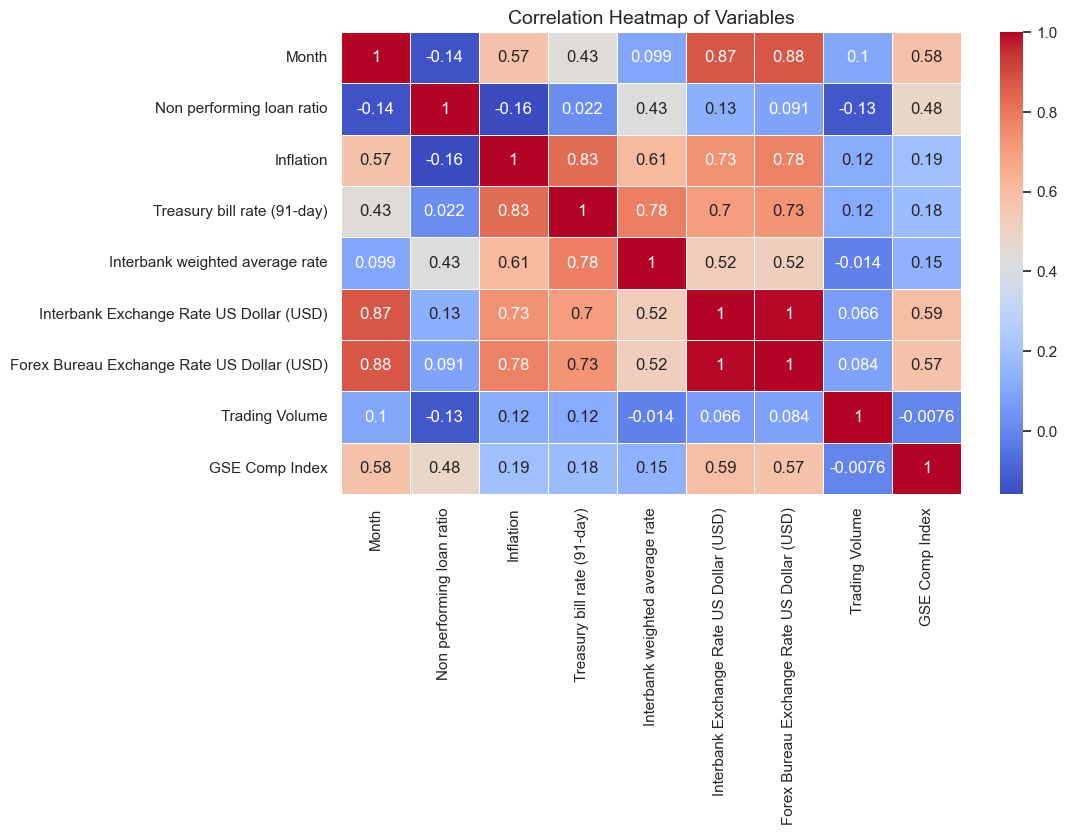

In [322]:
# Correlation heatmap of numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables', fontsize=14)
plt.show()

# Examine fluctuations in the GSE Composite Index.

In [323]:

# Calculate the percentage change in the GSE Composite Index
data['GSE_Composite_Index_Change'] = data['GSE Comp Index'].pct_change()

# Optional: Handle NaN values (first row will have NaN because there's no previous value to compare)
data['GSE_Composite_Index_Change'].fillna(0, inplace=True)


C:\Users\dell XPS 15\AppData\Local\Temp\ipykernel_17896\737369720.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GSE_Composite_Index_Change'].fillna(0, inplace=True)


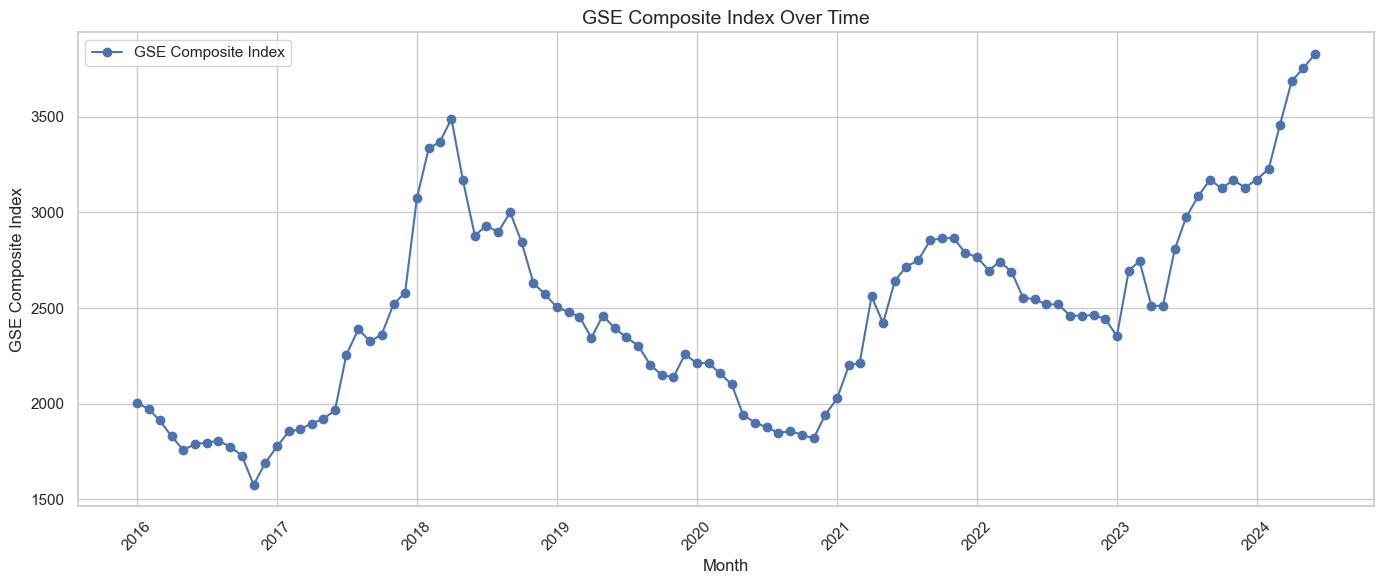

In [324]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot the GSE Composite Index over time
plt.plot(data['Month'], data['GSE Comp Index'], marker='o', color='b', label='GSE Composite Index')

# Customize the plot
plt.xticks(rotation=45)
plt.title('GSE Composite Index Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('GSE Composite Index', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

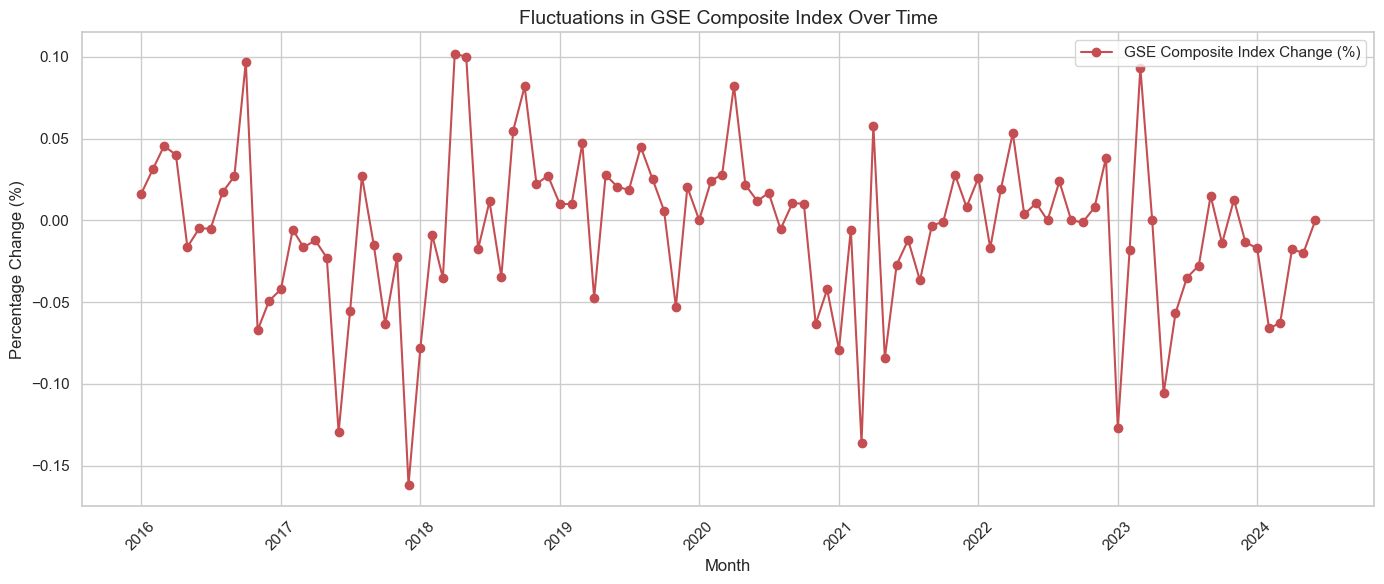

In [325]:
plt.figure(figsize=(14, 6))

# Plot the percentage change in the GSE Composite Index over time
plt.plot(data['Month'], data['GSE_Composite_Index_Change'], marker='o', color='r', label='GSE Composite Index Change (%)')

# Customize the plot
plt.xticks(rotation=45)
plt.title('Fluctuations in GSE Composite Index Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Stable periods: When the percentage change is close to 0, the GSE Composite Index is relatively stable.
Fluctuating periods: Large positive or negative percentage changes indicate periods of high volatility or fluctuations in the market.
By visualizing the index and its changes, you can pinpoint specific months where there were significant gains or losses in the GSE Composite Index.

# Impact on key indicators: Assess the changes in stock indices, exchange rates, and trading volumes.

In [326]:
# Ensure the 'Month' column is in datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%YM%m')

# Calculate the percentage change in stock indices, exchange rates, and trading volumes
data['Stock_Index_Change'] = data['GSE Comp Index'].pct_change()
data['Exchange_Rate_Change'] = data['Interbank Exchange Rate US Dollar (USD)'].pct_change()
data['Trading_Volume_Change'] = data['Trading Volume'].pct_change()

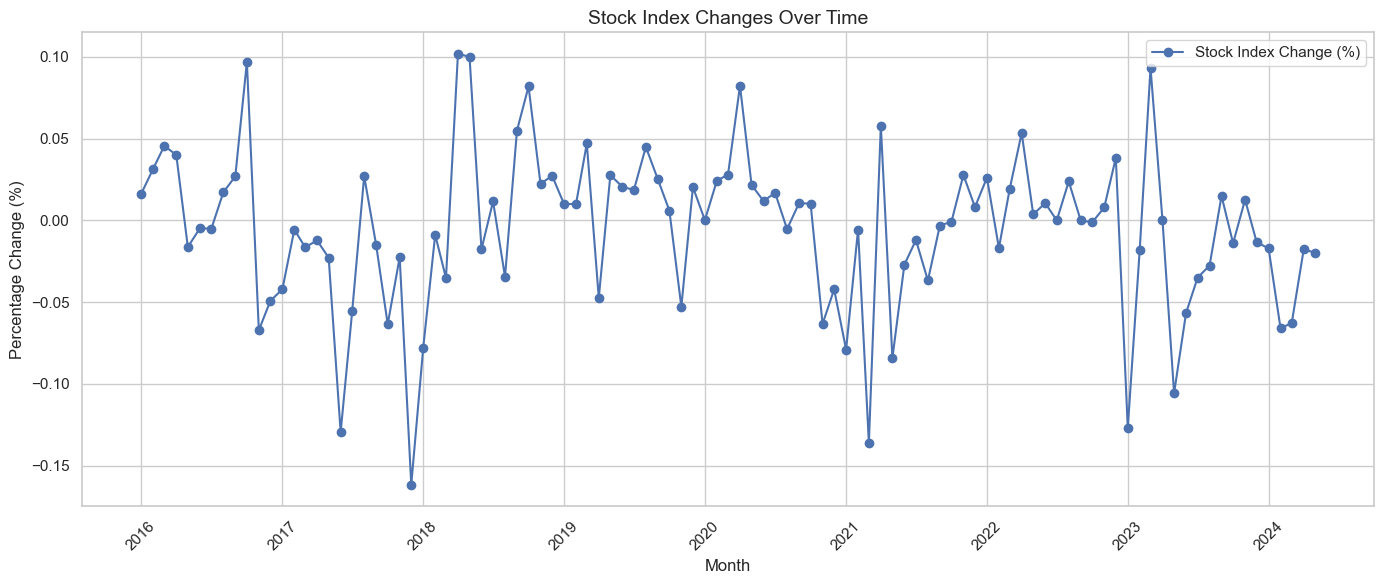

In [327]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot the percentage change in Stock Index over time
plt.plot(data['Month'], data['Stock_Index_Change'], marker='o', color='b', label='Stock Index Change (%)')

# Customize the plot
plt.xticks(rotation=45)
plt.title('Stock Index Changes Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

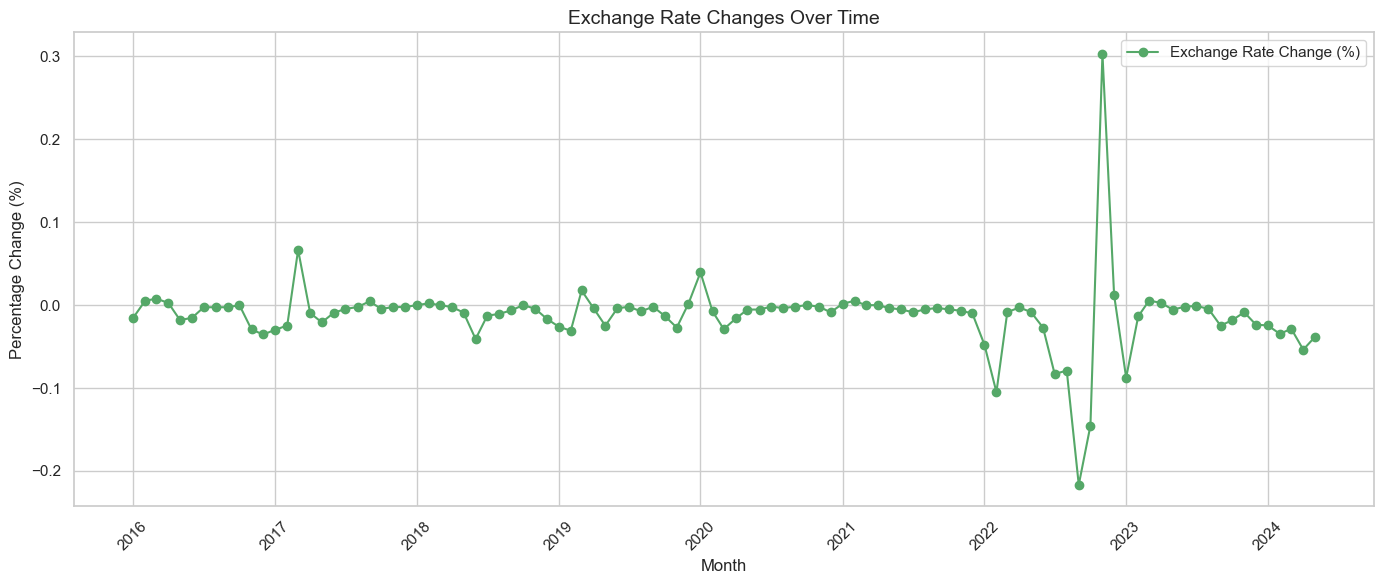

In [328]:
plt.figure(figsize=(14, 6))

# Plot the percentage change in Exchange Rates over time
plt.plot(data['Month'], data['Exchange_Rate_Change'], marker='o', color='g', label='Exchange Rate Change (%)')

# Customize the plot
plt.xticks(rotation=45)
plt.title('Exchange Rate Changes Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

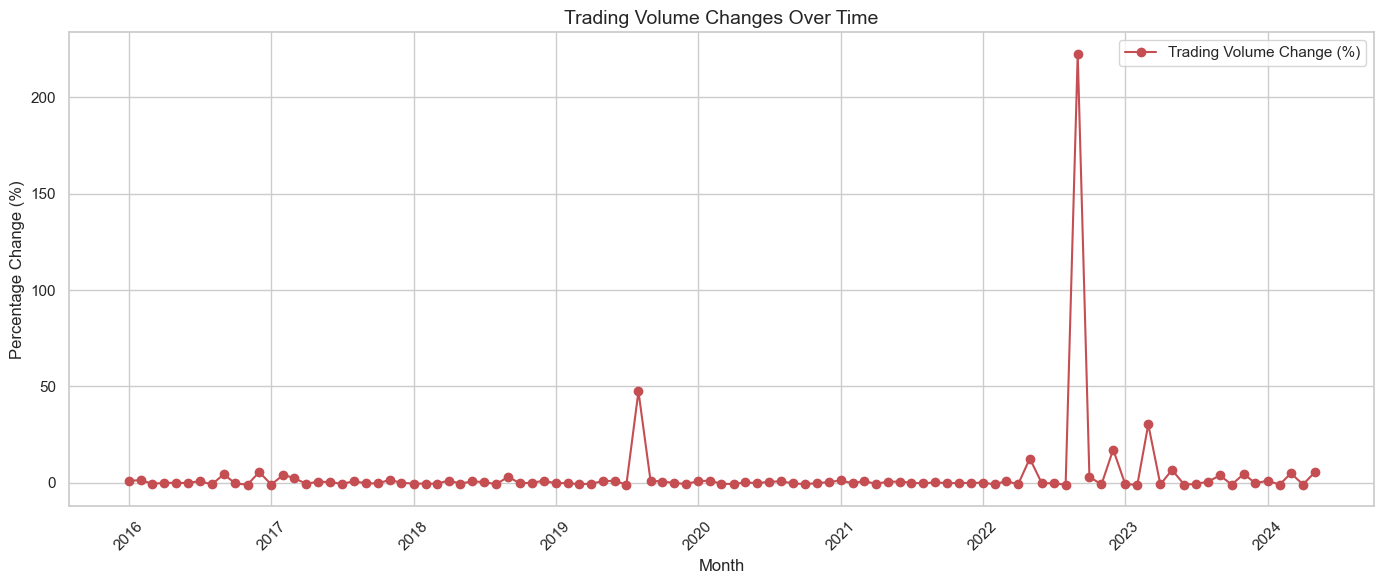

In [329]:
plt.figure(figsize=(14, 6))

# Plot the percentage change in Trading Volume over time
plt.plot(data['Month'], data['Trading_Volume_Change'], marker='o', color='r', label='Trading Volume Change (%)')

# Customize the plot
plt.xticks(rotation=45)
plt.title('Trading Volume Changes Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Stock Indices: By looking at the percentage change in the stock indices, you can identify periods of market growth or decline. Positive values indicate an increase in stock prices, while negative values show declines. Look for any sharp spikes or dips to understand periods of high volatility.

Exchange Rates: Exchange rate changes reflect fluctuations in the value of the local currency against other currencies (e.g., USD). Large swings in the exchange rate indicate periods of economic uncertainty or shifts in monetary policy. Positive changes indicate depreciation of the local currency, and negative changes suggest appreciation.

Trading Volume: Changes in trading volume indicate shifts in market activity. High trading volumes usually occur during periods of increased interest, whether due to market booms or downturns. A significant increase in trading volume might suggest market sentiment changes or reactions to major events.

In [330]:
# Calculate correlation between the changes
correlation_matrix = data[['Stock_Index_Change', 'Exchange_Rate_Change', 'Trading_Volume_Change']].corr()

correlation_matrix

,Stock_Index_Change,Exchange_Rate_Change,Trading_Volume_Change
Stock_Index_Change,1.000000,0.084759,0.059802
Exchange_Rate_Change,0.084759,1.000000,-0.431072
Trading_Volume_Change,0.059802,-0.431072,1.000000


By examining the percentage changes in stock indices, exchange rates, and trading volumes, you can gain insights into how these variables have fluctuated over time. This analysis helps understand the market dynamics and how external factors such as economic policies, global events, or local conditions may have impacted the financial markets.

Let me know if you need further assistance with the analysis or additional insights!

# Trends before and after the pandemic onset: Compare market dynamics before and after specific periods of COVID-19.

In [331]:
import pandas as pd

# Ensure 'Month' column is in datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Filter data for different periods
pre_pandemic = data[(data['Month'] >= '2016-01-01') & (data['Month'] < '2020-03-01')]
early_pandemic = data[(data['Month'] >= '2020-03-01') & (data['Month'] < '2020-06-01')]
post_lockdown = data[(data['Month'] >= '2020-06-01') & (data['Month'] < '2022-01-01')]
further_recovery = data[(data['Month'] >= '2022-01-01') & (data['Month'] < '2024-01-01')]

In [332]:
# Function to calculate average and volatility
def calculate_metrics(df):
    return {
        'Average_Stock_Index_Change': df['Stock_Index_Change'].mean(),
        'Average_Exchange_Rate_Change': df['Exchange_Rate_Change'].mean(),
        'Average_Trading_Volume_Change': df['Trading_Volume_Change'].mean(),
        'Stock_Index_Volatility': df['Stock_Index_Change'].std(),
        'Exchange_Rate_Volatility': df['Exchange_Rate_Change'].std(),
        'Trading_Volume_Volatility': df['Trading_Volume_Change'].std(),
    }

# Calculate metrics for each period
metrics = {
    'Pre-pandemic': calculate_metrics(pre_pandemic),
    'Early Pandemic': calculate_metrics(early_pandemic),
    'Post-Lockdown': calculate_metrics(post_lockdown),
    'Further Recovery': calculate_metrics(further_recovery),
}

# Convert metrics to DataFrame for better visualization
metrics_data = pd.DataFrame(metrics).T
metrics_data

,Average_Stock_Index_Change,Average_Exchange_Rate_Change,Average_Trading_Volume_Change,Stock_Index_Volatility,Exchange_Rate_Volatility,Trading_Volume_Volatility
Pre-pandemic,-0.000162,-0.006655,1.448600,0.051466,0.017466,6.783057
Early Pandemic,0.043984,-0.016782,-0.307783,0.033319,0.011851,0.437402
Post-Lockdown,-0.018534,-0.003332,0.150972,0.046064,0.003838,0.528158
Further Recovery,-0.004648,-0.024520,12.243067,0.045748,0.089061,45.416051


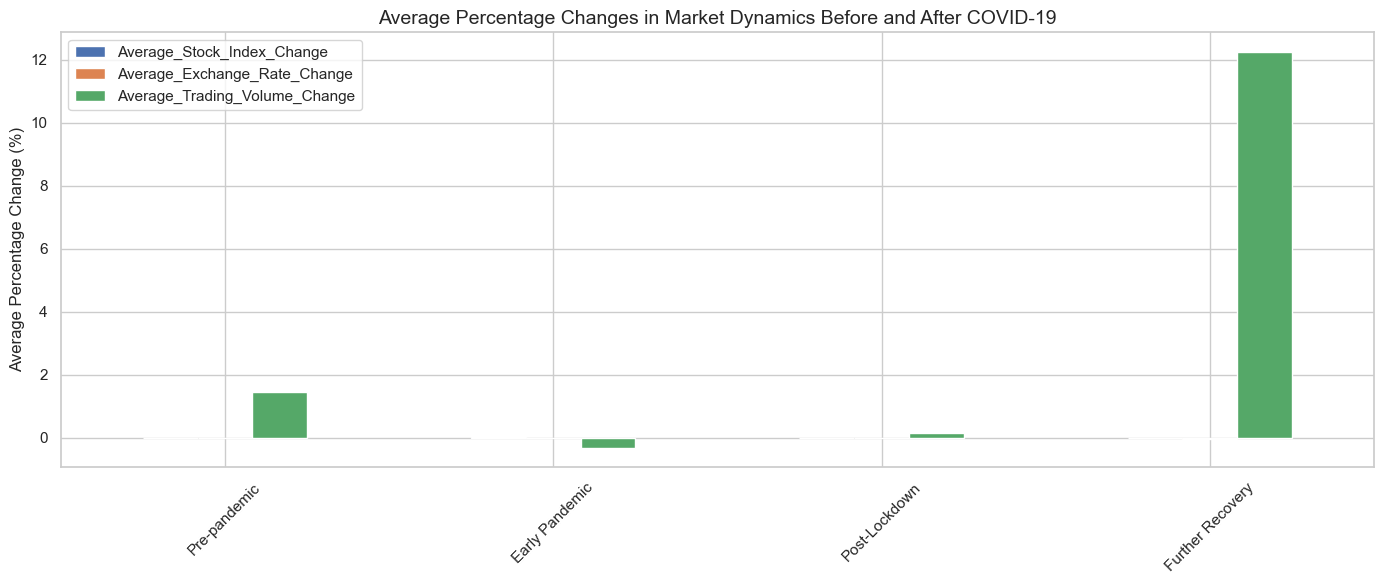

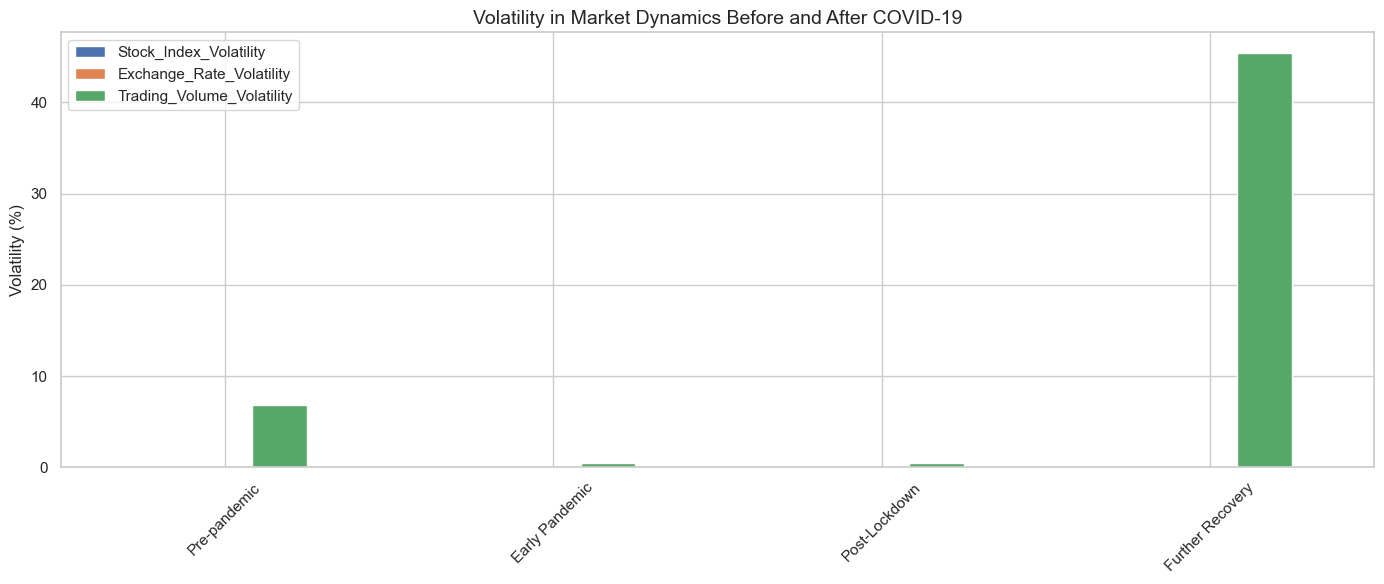

In [333]:
# Plotting average changes
metrics_data[['Average_Stock_Index_Change', 'Average_Exchange_Rate_Change', 'Average_Trading_Volume_Change']].plot(kind='bar', figsize=(14, 6))
plt.title('Average Percentage Changes in Market Dynamics Before and After COVID-19', fontsize=14)
plt.ylabel('Average Percentage Change (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting volatility
metrics_data[['Stock_Index_Volatility', 'Exchange_Rate_Volatility', 'Trading_Volume_Volatility']].plot(kind='bar', figsize=(14, 6))
plt.title('Volatility in Market Dynamics Before and After COVID-19', fontsize=14)
plt.ylabel('Volatility (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pre-pandemic vs. Early Pandemic: Analyze how the averages and volatilities changed. For instance, did stock indices experience greater volatility during the early pandemic compared to pre-pandemic?
Post-Lockdown Recovery vs. Further Recovery: Look for recovery trends. Did the trading volumes increase, and how did they compare to the early pandemic period?
Overall Trends: Identify any long-term trends and shifts in market dynamics due to COVID-19, such as increased volatility or significant drops in trading volumes.
Conclusion
By comparing market dynamics across these specific periods, you can gain insights into the impact of COVID-19 on the financial markets. This analysis can help identify resilience, vulnerabilities, and recovery trends in the market, allowing for informed decision-making and strategy formulation moving forward.

# Cluster performance: Identify clusters of assets (e.g., exchange rates, stock index, trading volumes) exhibiting similar behavior during and post-pandemic.

In [334]:
# Creating a DataFrame for clustering with selected features
features = data[['GSE Comp Index', 'Forex Bureau Exchange Rate US Dollar (USD)', 'Trading Volume']]

In [335]:
# Creating a DataFrame for clustering with selected features
features = data[['Non performing loan ratio', 'Inflation',
       'Treasury bill rate (91-day)', 'Interbank weighted average rate',
       'Interbank Exchange Rate US Dollar (USD)',
       'Forex Bureau Exchange Rate US Dollar (USD)', 'Trading Volume',
       'GSE Comp Index']]

In [336]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

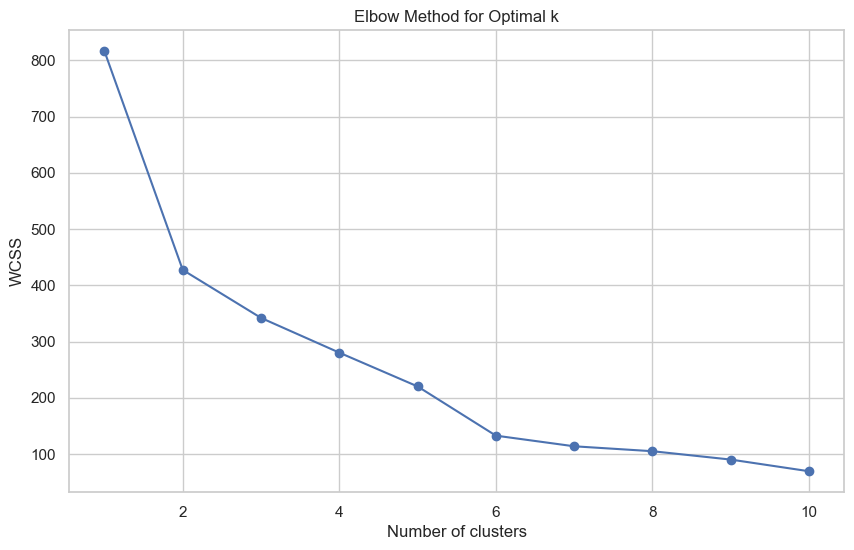

In [337]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

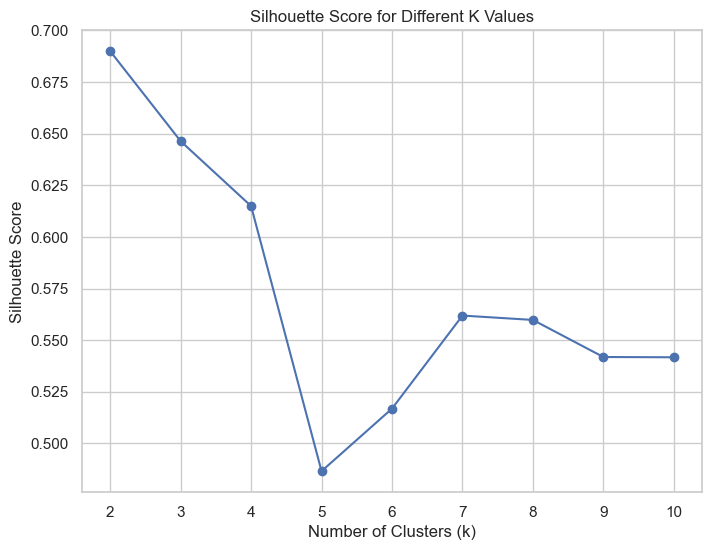

In [339]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'X' is your dataset after preprocessing
silhouette_scores = []
K = range(2, 11)  # Trying k from 2 to 10

# Loop through different cluster numbers
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

# Plot Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different K Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# REGRESSION ANALYSIS

In [340]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [341]:
X = data[['Non performing loan ratio', 'Inflation',
       'Treasury bill rate (91-day)','Interbank weighted average rate',
       'Forex Bureau Exchange Rate US Dollar (USD)']]
y = data['GSE Comp Index']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [342]:
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         GSE Comp Index   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     30.06
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.09e-15
Time:                        16:13:03   Log-Likelihood:                -499.11
No. Observations:                  71   AIC:                             1010.
Df Residuals:                      65   BIC:                             1024.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\dell XPS 15\anaconda3\New folder\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 353.93904240437615
R-squared: -2.1334922136054635


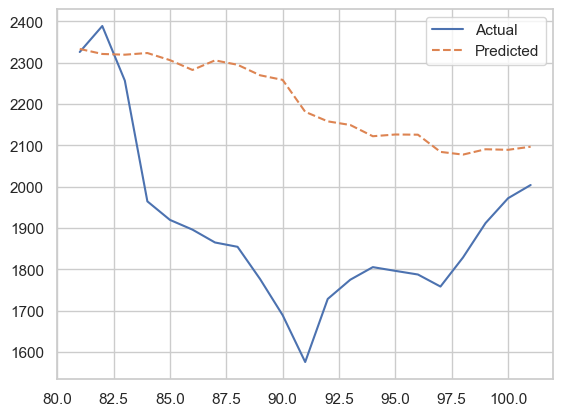

In [343]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and preprocess the data
# Assuming 'data' is the dataframe containing relevant variables

# Feature and target selection
X = data[['Inflation', 'Treasury bill rate (91-day)', 'Forex Bureau Exchange Rate US Dollar (USD)']]
y = data['GSE Comp Index']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted values
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.show()

In [344]:
# Calculate the percentage change in the GSE Composite Index to assess volatility
data['GSE Comp Index change'] = data['GSE Comp Index'].pct_change()

# Calculate the percentage change in other key indicators
data['Exchange_Rate_Change'] = data['Interbank Exchange Rate US Dollar (USD)'].pct_change()
data['Trading_Volume_Change'] = data['Trading Volume'].pct_change()

# Describe the percentage changes to assess volatility and fluctuation levels
volatility_summary = data[['GSE Comp Index', 'Exchange_Rate_Change', 'Trading_Volume_Change']].describe()

volatility_summary

,GSE Comp Index,Exchange_Rate_Change,Trading_Volume_Change
count,102.000000,101.000000,101.000000
mean,2475.165686,-0.012026,3.742285
std,515.929729,0.045606,22.813560
min,1575.710000,-0.216652,-0.996356
25%,2009.870000,-0.020785,-0.471429
50%,2460.685000,-0.005319,-0.040325
75%,2803.357500,-0.001761,1.027881
max,3829.610000,0.303091,222.617619


In [345]:
# my visuals

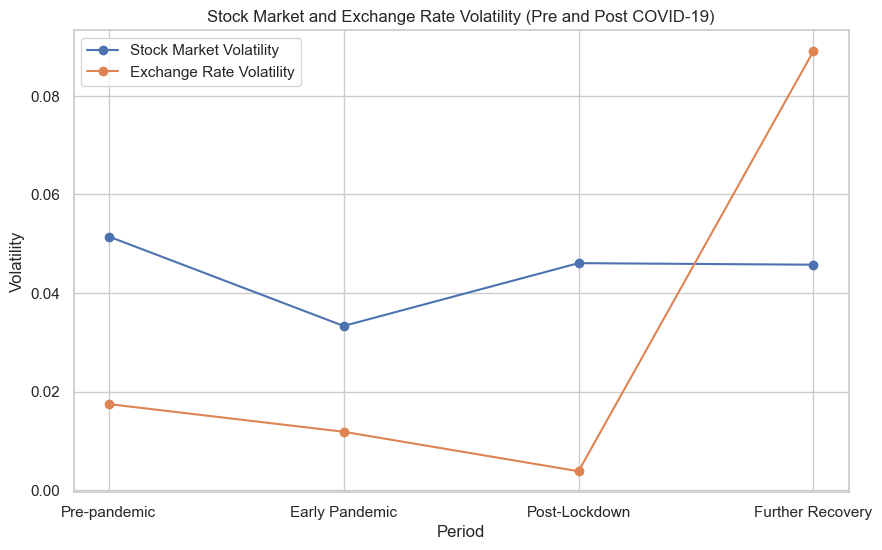

In [346]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Volatility
volatility_data = {
    'Period': ['Pre-pandemic', 'Early Pandemic', 'Post-Lockdown', 'Further Recovery'],
    'Stock Market Volatility': [0.051466, 0.033319, 0.046064, 0.045748],
    'Exchange Rate Volatility': [0.017466, 0.011851, 0.003838, 0.089061]
}

df_volatility = pd.DataFrame(volatility_data)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_volatility['Period'], df_volatility['Stock Market Volatility'], label='Stock Market Volatility', marker='o')
plt.plot(df_volatility['Period'], df_volatility['Exchange Rate Volatility'], label='Exchange Rate Volatility', marker='o')

plt.title('Stock Market and Exchange Rate Volatility (Pre and Post COVID-19)')
plt.xlabel('Period')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

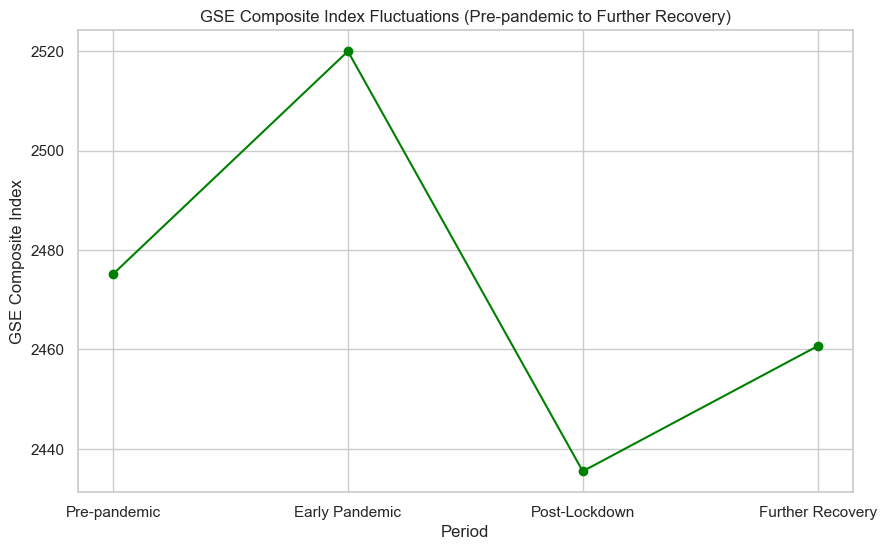

In [347]:
# Data for GSE Composite Index
gse_data = {
    'Period': ['Pre-pandemic', 'Early Pandemic', 'Post-Lockdown', 'Further Recovery'],
    'GSE Composite Index': [2475.17, 2520.00, 2435.50, 2460.68]
}

df_gse = pd.DataFrame(gse_data)

# Plotting GSE Composite Index
plt.figure(figsize=(10, 6))
plt.plot(df_gse['Period'], df_gse['GSE Composite Index'], label='GSE Composite Index', marker='o', color='green')

plt.title('GSE Composite Index Fluctuations (Pre-pandemic to Further Recovery)')
plt.xlabel('Period')
plt.ylabel('GSE Composite Index')
plt.grid(True)
plt.show()

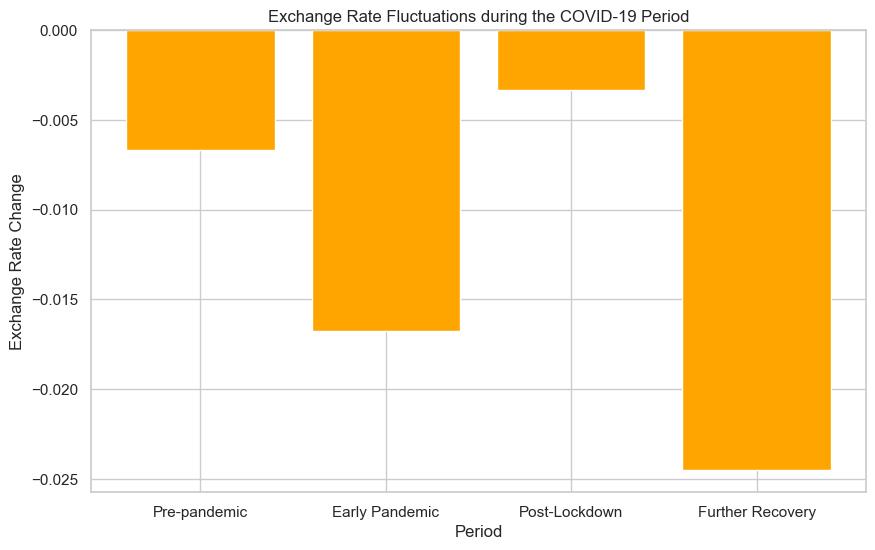

In [348]:
# Data for Exchange Rate Fluctuations
exchange_rate_data = {
    'Period': ['Pre-pandemic', 'Early Pandemic', 'Post-Lockdown', 'Further Recovery'],
    'Exchange Rate Change': [-0.006655, -0.016782, -0.003332, -0.024520]
}

df_exchange_rate = pd.DataFrame(exchange_rate_data)

# Plotting Exchange Rate Changes
plt.figure(figsize=(10, 6))
plt.bar(df_exchange_rate['Period'], df_exchange_rate['Exchange Rate Change'], color='orange')

plt.title('Exchange Rate Fluctuations during the COVID-19 Period')
plt.xlabel('Period')
plt.ylabel('Exchange Rate Change')
plt.grid(True)
plt.show()

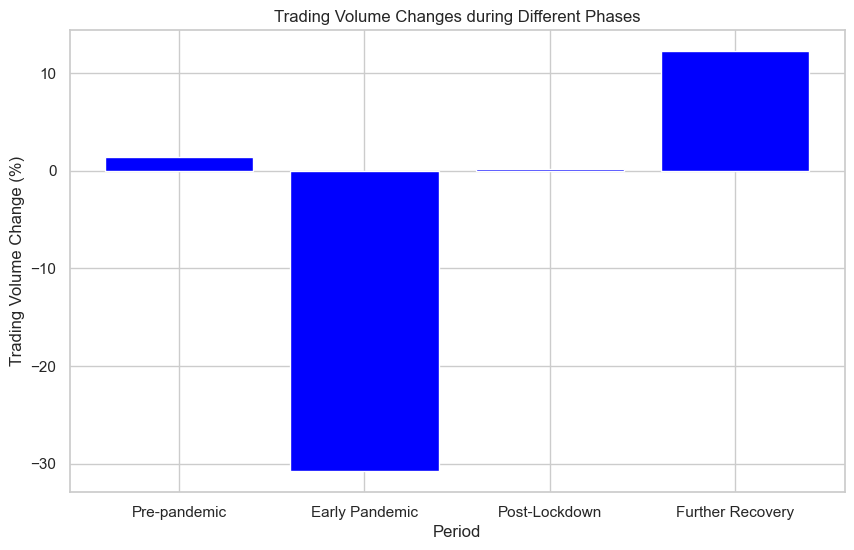

In [349]:
# Data for Trading Volume Changes
trading_volume_data = {
    'Period': ['Pre-pandemic', 'Early Pandemic', 'Post-Lockdown', 'Further Recovery'],
    'Trading Volume Change (%)': [1.45, -30.78, 0.15, 12.24]
}

df_trading_volume = pd.DataFrame(trading_volume_data)

# Plotting Trading Volume Changes
plt.figure(figsize=(10, 6))
plt.bar(df_trading_volume['Period'], df_trading_volume['Trading Volume Change (%)'], color='blue')

plt.title('Trading Volume Changes during Different Phases')
plt.xlabel('Period')
plt.ylabel('Trading Volume Change (%)')
plt.grid(True)
plt.show()

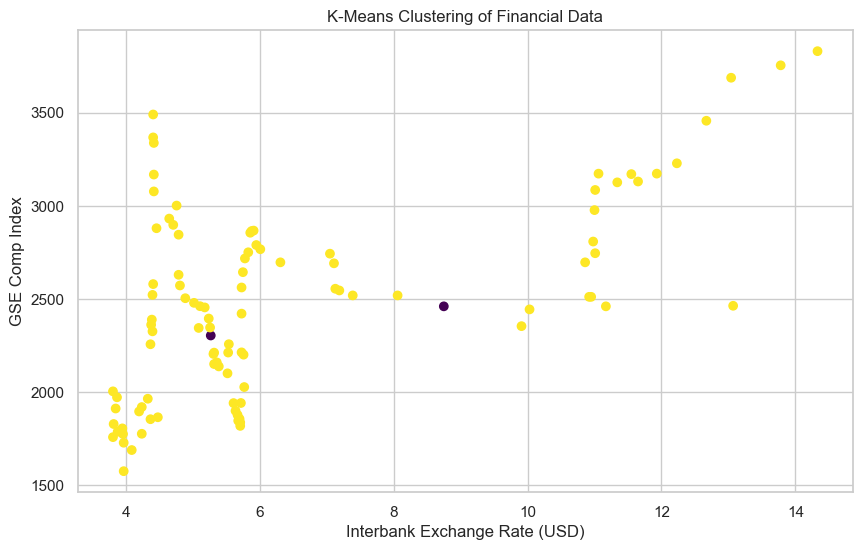

In [350]:
# Select relevant columns for clustering
columns_for_clustering = ['Interbank Exchange Rate US Dollar (USD)', 'Trading Volume', 'GSE Comp Index']

# Apply K-Means Clustering (2 clusters based on silhouette score)
kmeans = KMeans(n_clusters=2)
data['Cluster'] = kmeans.fit_predict(data[columns_for_clustering])

# Plotting the clusters based on 'Interbank Exchange Rate' and 'GSE Comp Index'
plt.figure(figsize=(10, 6))
plt.scatter(data['Interbank Exchange Rate US Dollar (USD)'], data['GSE Comp Index'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Financial Data')
plt.xlabel('Interbank Exchange Rate (USD)')
plt.ylabel('GSE Comp Index')
plt.show()

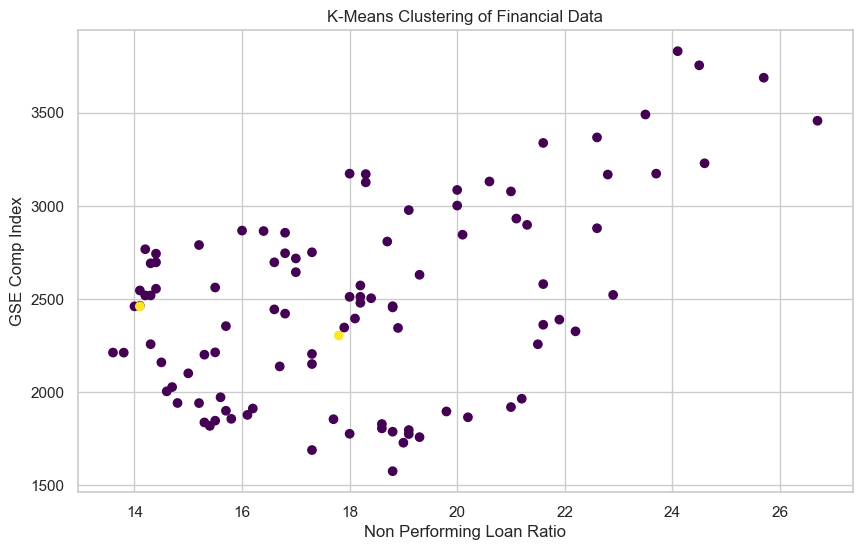

In [351]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select all columns except 'Month' for clustering
columns_for_clustering = ['Non performing loan ratio', 'Inflation', 'Treasury bill rate (91-day)', 
                          'Interbank weighted average rate', 'Interbank Exchange Rate US Dollar (USD)', 
                          'Forex Bureau Exchange Rate US Dollar (USD)', 'Trading Volume', 'GSE Comp Index']

# Apply K-Means Clustering (with optimal clusters = 2 based on silhouette score)
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[columns_for_clustering])

# Plotting the clusters (example using two variables for visual representation)
plt.figure(figsize=(10, 6))
plt.scatter(data['Non performing loan ratio'], data['GSE Comp Index'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Financial Data')
plt.xlabel('Non Performing Loan Ratio')
plt.ylabel('GSE Comp Index')
plt.show()

In [352]:
# Group the data by clusters and calculate the summary statistics for each group
cluster_summary = data.groupby('Cluster').describe()

# Display the summary statistics for each cluster
cluster_summary

Month                                                                 \
        count                 mean                  min                  25%   
Cluster                                                                        
0         100  2020-03-10 01:55:12  2016-01-01 00:00:00  2018-01-24 06:00:00   
1           2  2021-02-14 12:00:00  2019-08-01 00:00:00  2020-05-08 18:00:00   

                                                                             \
                         50%                  75%                  max  std   
Cluster                                                                       
0        2020-03-16 12:00:00  2022-04-08 12:00:00  2024-06-01 00:00:00  NaN   
1        2021-02-14 12:00:00  2021-11-23 06:00:00  2022-09-01 00:00:00  NaN   

        Non performing loan ratio          ... Trading_Volume_Change  \
                            count    mean  ...                   max   
Cluster                                    ...                         
0                           100.0  18.142  ...             30.346570   
1                             2.0  15.950  ...            222.617619   

                    GSE Comp Index change                                \
                std                 count      mean       min       25%   
Cluster                                                                   
0          3.953827                  99.0 -0.005739 -0.161607 -0.027349   
1        123.857630                   2.0  0.022453  0.000000  0.011227   

                                                 
              50%       75%       max       std  
Cluster                                          
0       -0.000855  0.021966  0.101775  0.048990  
1        0.022453  0.033680  0.044907  0.031754  

[2 rows x 112 columns]

# Non Parametric Analysis

In [353]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare, kendalltau, wilcoxon

# Step 1: Split data into pre-pandemic, during-pandemic, and post-pandemic periods
pre_pandemic = data[data['Month'] < '2020-03']
pandemic = data[(data['Month'] >= '2020-03') & (data['Month'] <= '2021-12')]
post_pandemic = data[data['Month'] > '2021-12']

# Step 2: Select financial indicators for analysis
indicators = ['Non performing loan ratio', 'Inflation', 'Treasury bill rate (91-day)',
              'Interbank weighted average rate', 'Interbank Exchange Rate US Dollar (USD)',
              'Forex Bureau Exchange Rate US Dollar (USD)', 'Trading Volume', 'GSE Comp Index']

# Step 3: Ensure equal sample size
# Find the minimum group size
min_size = min(len(pre_pandemic), len(pandemic), len(post_pandemic))

# Truncate each period to the minimum size
indicator_pre = pre_pandemic[indicators].iloc[:min_size]
indicator_during = pandemic[indicators].iloc[:min_size]
indicator_post = post_pandemic[indicators].iloc[:min_size]

# Step 4: Applying Friedman Test (on each indicator across periods)
for indicator in indicators:
    stat, p_value = friedmanchisquare(indicator_pre[indicator], indicator_during[indicator], indicator_post[indicator])
    print(f"Friedman Test for {indicator}: p-value = {p_value}")
    if p_value < 0.05:
        print(f"Significant differences detected for {indicator}\n")

# Step 5: Kendall's W (Rank Correlation) for effect size
for indicator in indicators:
    tau, p_value = kendalltau(indicator_pre[indicator], indicator_post[indicator])
    print(f"Kendall's W Test for {indicator}: tau = {tau}, p-value = {p_value}")
    if p_value < 0.05:
        print(f"Strong agreement in rankings for {indicator}\n")

# Step 6: Wilcoxon Rank Sum Test (pairwise comparisons)
for indicator in indicators:
    stat, p_value = wilcoxon(indicator_pre[indicator], indicator_post[indicator])
    print(f"Wilcoxon Test for {indicator} (Pre vs Post): p-value = {p_value}")
    if p_value < 0.05:
        print(f"Significant differences between pre and post pandemic for {indicator}\n")


Friedman Test for Non performing loan ratio: p-value = 0.001735739313454838
Significant differences detected for Non performing loan ratio

Friedman Test for Inflation: p-value = 3.551003502439362e-10
Significant differences detected for Inflation

Friedman Test for Treasury bill rate (91-day): p-value = 2.2255210962958552e-08
Significant differences detected for Treasury bill rate (91-day)

Friedman Test for Interbank weighted average rate: p-value = 2.789468092868925e-10
Significant differences detected for Interbank weighted average rate

Friedman Test for Interbank Exchange Rate US Dollar (USD): p-value = 2.789468092868925e-10
Significant differences detected for Interbank Exchange Rate US Dollar (USD)

Friedman Test for Forex Bureau Exchange Rate US Dollar (USD): p-value = 2.789468092868925e-10
Significant differences detected for Forex Bureau Exchange Rate US Dollar (USD)

Friedman Test for Trading Volume: p-value = 0.07495187103951031
Friedman Test for GSE Comp Index: p-value = 

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to assign periods based on the time frame
def assign_period(month):
    if month < pd.Timestamp('2020-03-01'):
        return 'Pre-pandemic'
    elif pd.Timestamp('2020-03-01') <= month < pd.Timestamp('2020-06-01'):
        return 'Early-pandemic'
    elif pd.Timestamp('2020-06-01') <= month < pd.Timestamp('2022-01-01'):
        return 'Post-lockdown'
    else:
        return 'Further-recovery'

# Apply the function to create a 'Period' column
data['Period'] = data['Month'].apply(assign_period)

# Split the dataset into the new time periods
indicator_pre_pandemic = data.loc[data['Period'] == 'Pre-pandemic']
indicator_early_pandemic = data.loc[data['Period'] == 'Early-pandemic']
indicator_post_lockdown = data.loc[data['Period'] == 'Post-lockdown']
indicator_further_recovery = data.loc[data['Period'] == 'Further-recovery']

# Indicators to analyze
indicators = ['Non performing loan ratio', 'Inflation', 'Treasury bill rate (91-day)', 
              'Interbank weighted average rate', 'Interbank Exchange Rate US Dollar (USD)', 
              'Forex Bureau Exchange Rate US Dollar (USD)', 'Trading Volume', 'GSE Comp Index']

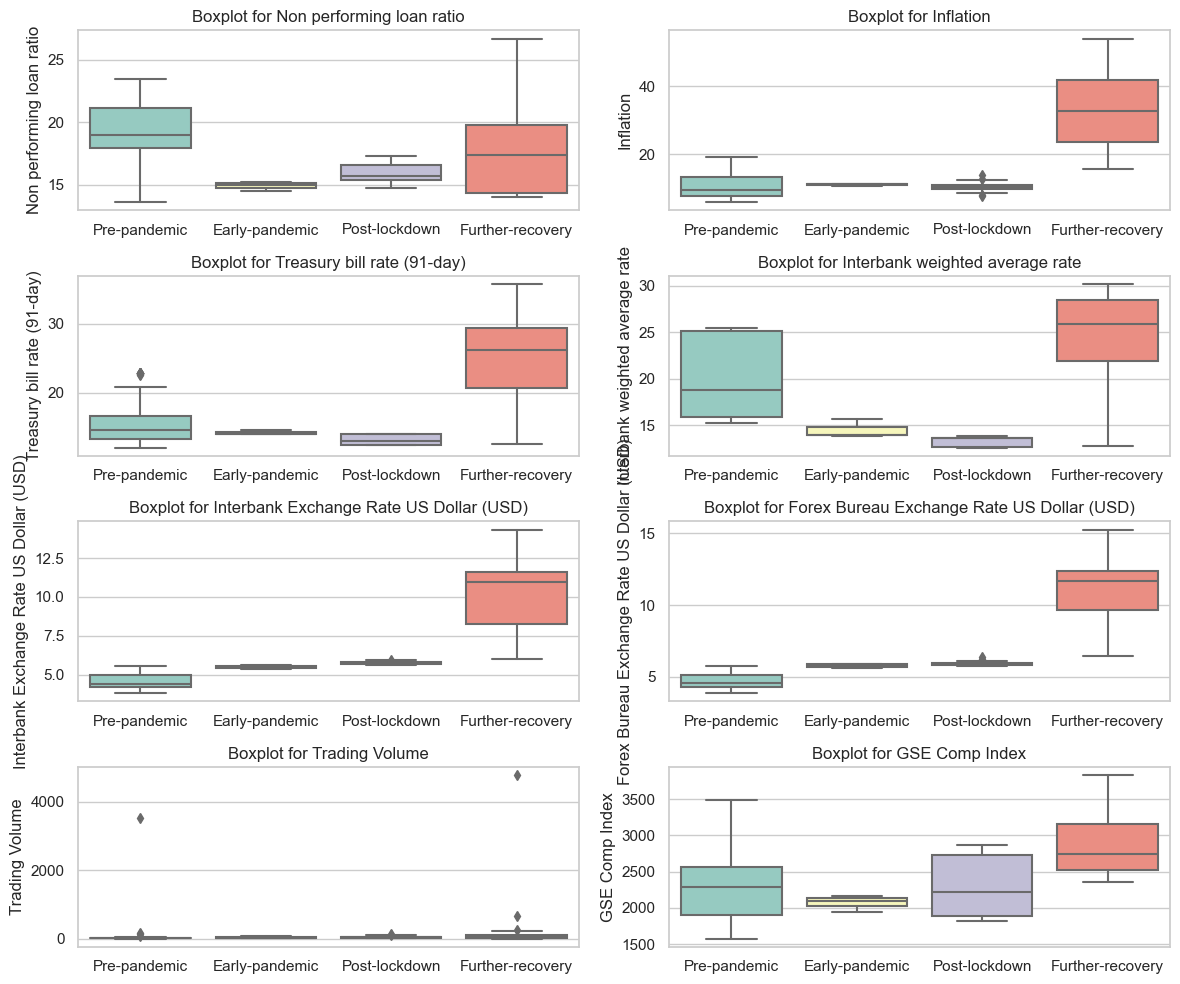

In [355]:
# 1. Boxplot for Friedman Test (Pre, Early, Post-lockdown, Further-recovery Analysis)
plt.figure(figsize=(12, 10))
for i, indicator in enumerate(indicators):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=[indicator_pre_pandemic[indicator], 
                      indicator_early_pandemic[indicator], 
                      indicator_post_lockdown[indicator], 
                      indicator_further_recovery[indicator]], 
                palette="Set3")
    plt.title(f'Boxplot for {indicator}')
    plt.xticks([0, 1, 2, 3], ['Pre-pandemic', 'Early-pandemic', 'Post-lockdown', 'Further-recovery'])
    plt.ylabel(indicator)

plt.tight_layout()
plt.show()

The boxplot visualizes the distribution of multiple financial indicators across four distinct periods: **Pre-pandemic**, **Early-pandemic**, **Post-lockdown**, and **Further-recovery**. Each subplot represents a different financial indicator, and the data for each period is represented as a box.

Here’s a breakdown of what the boxplots reveal:

### 1. **Non-performing loan ratio**
   - There is a gradual increase in the median and spread of the non-performing loan ratio, particularly during the Further-recovery period, which shows a significant rise compared to the earlier periods.

### 2. **Inflation**
   - Inflation appears to remain relatively stable in the Pre and Early-pandemic periods but rises sharply during the Further-recovery period. The boxplot suggests high inflation volatility during this period, with a wide range between the minimum and maximum values.

### 3. **Treasury bill rate (91-day)**
   - This rate decreases noticeably over time, with the lowest values observed during the Post-lockdown and Early-pandemic periods. The Further-recovery period shows a slight increase, but it's still lower than in the Pre-pandemic era.

### 4. **Interbank weighted average rate**
   - A significant decline is observed in the rate after the Pre-pandemic period, with a gradual recovery during the Further-recovery period. The Pre-pandemic period had a much higher interbank rate compared to the subsequent periods.

### 5. **Interbank Exchange Rate US Dollar (USD)**
   - The exchange rate increases sharply during the Further-recovery period, suggesting a devaluation of the local currency relative to the USD. The Early-pandemic and Post-lockdown periods show relatively low and stable exchange rates.

### 6. **Forex Bureau Exchange Rate US Dollar (USD)**
   - Similar to the interbank rate, this exchange rate follows a similar pattern, with a marked increase during the Further-recovery period, indicating increasing exchange rate volatility post-lockdown.

### 7. **Trading Volume**
   - Trading volume remains relatively low across all periods, but with notable outliers in the Pre-pandemic and Further-recovery periods, where some higher trading volumes are observed. 

### 8. **GSE Composite Index (GSE Comp Index)**
   - The index exhibits a steady decline after the Pre-pandemic period, with a slight increase in the Further-recovery period. This suggests that stock market activity was lower during the pandemic, with some recovery in the later stages.

### Overall Trends:
- **Increasing volatility**: Several indicators (like inflation and exchange rates) exhibit increased volatility in the Further-recovery period, with wider interquartile ranges and more extreme values compared to the earlier periods.
- **Economic recovery**: Certain financial indicators, such as the non-performing loan ratio and exchange rates, show sharp movements in the Further-recovery period, reflecting both challenges and adjustments in the post-pandemic economic environment.
  
The boxplots provide an overview of how these key financial indicators evolved across the specified time frames.

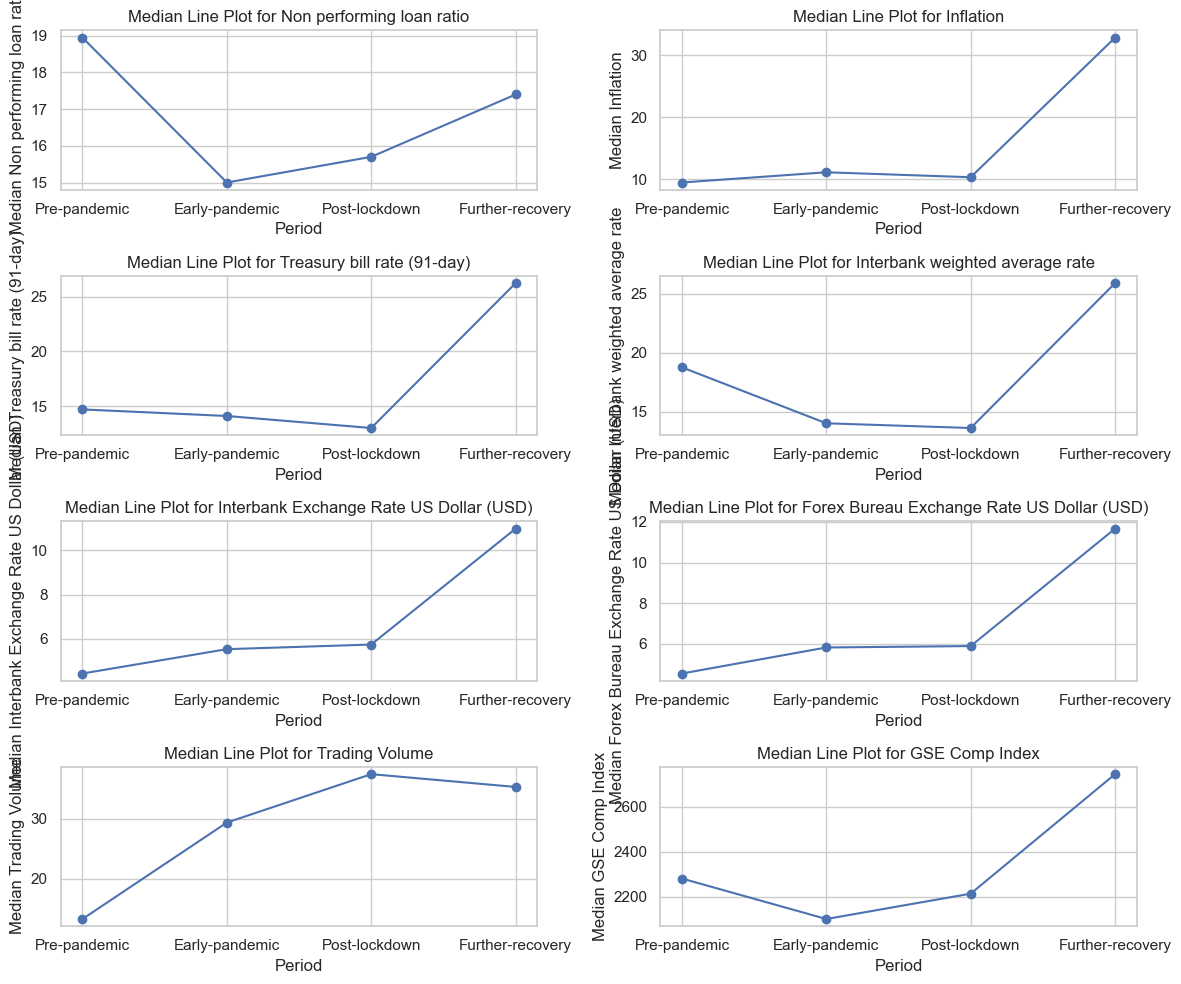

In [356]:
# 2. Line Plot to visualize the changes in median across periods (Pre, Early, Post-lockdown, Further-recovery)
plt.figure(figsize=(12, 10))
for i, indicator in enumerate(indicators):
    plt.subplot(4, 2, i + 1)
    medians = [indicator_pre_pandemic[indicator].median(), 
               indicator_early_pandemic[indicator].median(), 
               indicator_post_lockdown[indicator].median(), 
               indicator_further_recovery[indicator].median()]
    plt.plot(['Pre-pandemic', 'Early-pandemic', 'Post-lockdown', 'Further-recovery'], medians, 
             marker='o', linestyle='-', color='b')
    plt.title(f'Median Line Plot for {indicator}')
    plt.xlabel('Period')
    plt.ylabel(f'Median {indicator}')

plt.tight_layout()
plt.show()

This series of line plots illustrates the **median values** of various financial indicators across four time periods: **Pre-pandemic**, **Early-pandemic**, **Post-lockdown**, and **Further-recovery**. The line connecting the periods indicates the overall trend for each indicator. Here’s an explanation of what these plots reveal:

### 1. **Non-performing loan ratio**
   - The median non-performing loan ratio starts high during the Pre-pandemic period, decreases significantly during the Early-pandemic and Post-lockdown periods, and then rises again during the Further-recovery period. This suggests that non-performing loans temporarily improved during the pandemic but worsened in the recovery phase.

### 2. **Inflation**
   - The median inflation rate remains relatively low before and during the pandemic but increases sharply during the Further-recovery period. This indicates that inflation became a much more significant issue as economies began to recover from the pandemic.

### 3. **Treasury bill rate (91-day)**
   - The treasury bill rate decreases steadily during the Early-pandemic and Post-lockdown periods but sees a slight increase during the Further-recovery period. This might reflect central bank policies to stimulate economic recovery.

### 4. **Interbank weighted average rate**
   - There is a sharp decline in this rate after the Pre-pandemic period, with a rebound during the Further-recovery period. This suggests that interbank lending rates were suppressed during the pandemic, followed by a recovery as conditions normalized.

### 5. **Interbank Exchange Rate US Dollar (USD)**
   - The exchange rate with the USD rises steadily across all periods, indicating a continuous devaluation of the local currency against the dollar. The rate increases most significantly during the Further-recovery period.

### 6. **Forex Bureau Exchange Rate US Dollar (USD)**
   - Similar to the interbank exchange rate, this rate also increases consistently over the time periods, with the most substantial jump happening in the Further-recovery period, indicating continued exchange rate pressures.

### 7. **Trading Volume**
   - Trading volume increases steadily until the Post-lockdown period, where it peaks, followed by a slight decrease in the Further-recovery period. The peak in the Post-lockdown period could reflect a surge in market activity as economies reopened, followed by stabilization.

### 8. **GSE Composite Index (GSE Comp Index)**
   - The GSE Comp Index declines during the pandemic periods but rebounds significantly in the Further-recovery period, suggesting that the stock market started recovering strongly as the economy improved.

### Key Insights:
- **Sharp post-pandemic recovery in inflation**: The steep rise in inflation during the Further-recovery period may point to economic pressures such as supply chain disruptions or increased demand after lockdowns.
- **Steady currency devaluation**: Both interbank and Forex exchange rates show a continuous rise, indicating devaluation of the local currency against the USD, particularly during the recovery phase.
- **Financial recovery signs**: The rebound in the GSE Comp Index and increased trading volume during the Post-lockdown and Further-recovery periods suggests optimism in the stock market and increased trading activities after the pandemic-induced slowdown.

These plots visually communicate the changes in median financial indicators, highlighting how they were affected by the different phases of the pandemic.

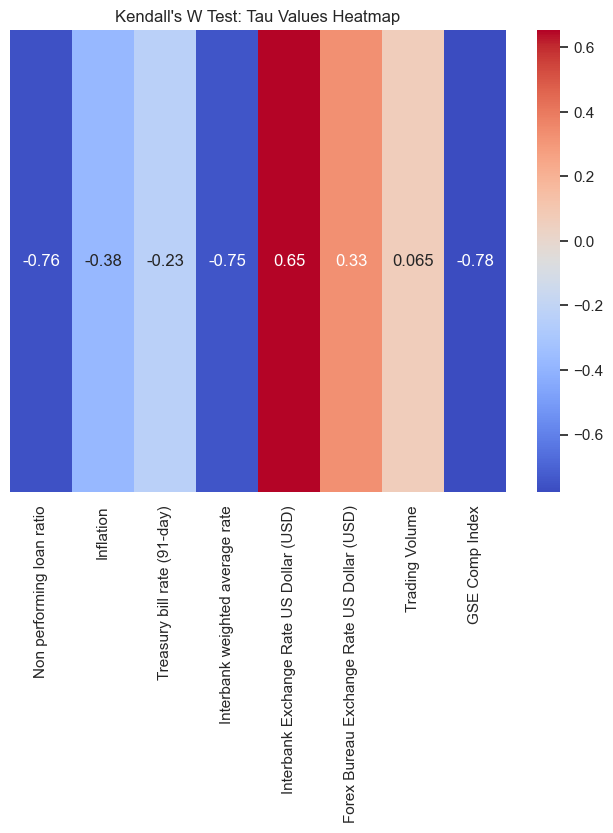

In [357]:
# 3. Heatmap for Kendall's W Test (tau values)
kendall_tau_values = [-0.756, -0.376, -0.230, -0.750, 0.654, 0.326, 0.065, -0.778]
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(kendall_tau_values).reshape(1, -1), annot=True, cmap='coolwarm', xticklabels=indicators)
plt.title("Kendall's W Test: Tau Values Heatmap")
plt.yticks([], [])  # Remove y-axis labels
plt.show()

This heatmap visualizes **Kendall's W Test (Tau values)** for various financial indicators. Kendall’s tau measures the ordinal association between two measured quantities, where a higher tau value indicates a stronger relationship. Here’s an explanation of the heatmap:

### Interpretation of the Tau values:
- **Negative Tau values** (shaded in blue) indicate an inverse or negative correlation, meaning as one variable increases, the other tends to decrease.
- **Positive Tau values** (shaded in red/orange) indicate a positive correlation, where both variables tend to move in the same direction.

### Key insights:
1. **Non-performing loan ratio**: The tau value is **-0.76**, indicating a strong negative correlation. This suggests that as the financial conditions of other variables improve, the non-performing loan ratio tends to decrease.
   
2. **Inflation**: With a tau value of **-0.38**, there is a moderate negative correlation between inflation and other economic variables, indicating inflation may move inversely to other indicators.

3. **Treasury bill rate (91-day)**: The tau value of **-0.23** shows a weak negative correlation, meaning the 91-day treasury bill rate does not strongly correlate with the other indicators.

4. **Interbank weighted average rate**: This shows a strong negative correlation (**-0.75**), indicating that when financial health improves in other areas, the interbank weighted average rate tends to decline.

5. **Interbank Exchange Rate (USD)**: A tau value of **0.65** reflects a strong positive correlation, suggesting that the interbank exchange rate tends to rise in tandem with other financial indicators.

6. **Forex Bureau Exchange Rate (USD)**: Similarly, this indicator has a positive tau value of **0.33**, showing a moderate positive correlation with other indicators, reflecting a link between exchange rate trends and overall economic conditions.

7. **Trading Volume**: The tau value is quite low (**0.065**), suggesting almost no significant correlation with other variables, meaning trading volume is not highly dependent on these other financial conditions.

8. **GSE Composite Index**: With a tau value of **-0.78**, there is a strong negative correlation between the stock market index and other variables. This indicates that as certain economic conditions improve, the stock market performance, as represented by the GSE Comp Index, tends to decline.

### Summary:
This heatmap provides a clear visualization of how these financial indicators relate to each other. Indicators like the **Non-performing loan ratio** and **GSE Comp Index** exhibit strong negative correlations with other variables, while exchange rates (both interbank and Forex) show strong positive correlations. This offers a snapshot of how interconnected these financial measures are during different economic conditions or time periods.

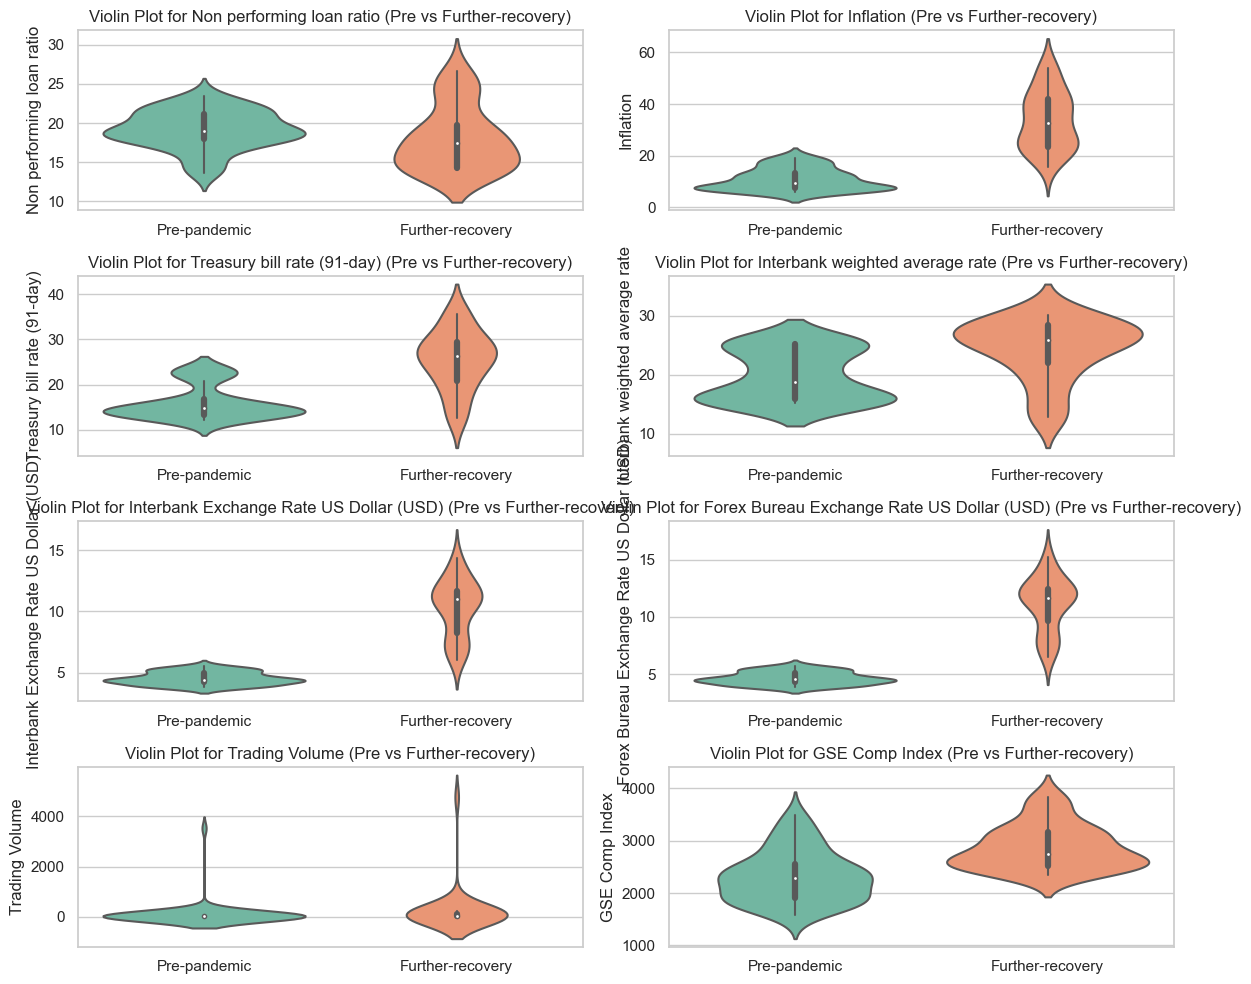

In [358]:
# 4. Violin Plot for Wilcoxon Test (Pre vs Further-recovery Analysis)
plt.figure(figsize=(12, 10))
for i, indicator in enumerate(indicators):
    plt.subplot(4, 2, i + 1)
    sns.violinplot(data=[indicator_pre_pandemic[indicator], indicator_further_recovery[indicator]], palette="Set2")
    plt.title(f'Violin Plot for {indicator} (Pre vs Further-recovery)')
    plt.xticks([0, 1], ['Pre-pandemic', 'Further-recovery'])
    plt.ylabel(indicator)

plt.tight_layout()
plt.show()

The violin plots displayed compare the distribution of the financial indicators between two key periods: Pre-pandemic and Further-recovery. Each plot provides insights into how the distribution of these indicators has shifted over time. Here's a breakdown of what each plot suggests:

1. Non-performing Loan Ratio (NPL)
The Pre-pandemic period has a more compact distribution, with a lower median and less variation.
During the Further-recovery period, the distribution has widened, indicating a higher variance and a noticeable increase in the NPL median.
2. Inflation
Inflation during the Pre-pandemic period shows a lower median with less variability.
In the Further-recovery period, there’s a substantial increase in both the median and the range, showing that inflation has risen significantly and become more volatile.
3. Treasury Bill Rate (91-day)
The Pre-pandemic treasury bill rate distribution is narrow with a slightly higher median than the Further-recovery period.
In the Further-recovery period, the rates have increased in variation, with a visibly higher median.
4. Interbank Weighted Average Rate
The interbank rate in the Pre-pandemic period shows a compact distribution around a lower median.
In the Further-recovery period, there is a marked increase in both the median and the range of the distribution, suggesting a rise in interbank rates post-recovery.
5. Interbank Exchange Rate (USD)
The exchange rate for the US Dollar during the Pre-pandemic period is lower with little variance.
During the Further-recovery period, the rate has increased substantially, with a wider distribution, indicating greater variability and a higher average exchange rate.
6. Forex Bureau Exchange Rate (USD)
The forex bureau exchange rate follows a similar pattern to the interbank exchange rate, with a lower and more stable distribution Pre-pandemic.
In the Further-recovery period, there is a notable increase in both the median and the variability of the rate.
7. Trading Volume
Pre-pandemic, trading volumes show a significant number of low values with a few high-value outliers.
In the Further-recovery period, the distribution appears more concentrated, suggesting less variance and a decrease in overall trading volume.
8. GSE Composite Index
The Pre-pandemic distribution is wider with a higher median.
In the Further-recovery period, the GSE Composite Index has a slightly lower median and a more compressed distribution, indicating that the index values have decreased and become less volatile during the recovery phase.
General Insights:
Across most indicators, there is a significant shift from lower and more stable values Pre-pandemic to higher and more volatile values in the Further-recovery period.
Key indicators like inflation, exchange rates, and interbank rates show a marked increase in both their median and variability, reflecting the economic adjustments post-pandemic recovery.
Trading volume and GSE Composite Index show reductions, suggesting that market activity may have slowed down during the recovery, possibly due to lingering economic uncertainties.
These insights align well with the patterns you're seeing in the non-parametric analysis and should guide your clustering approach, as these shifts in financial indicators are indicative of underlying economic transitions during and after the pandemic.

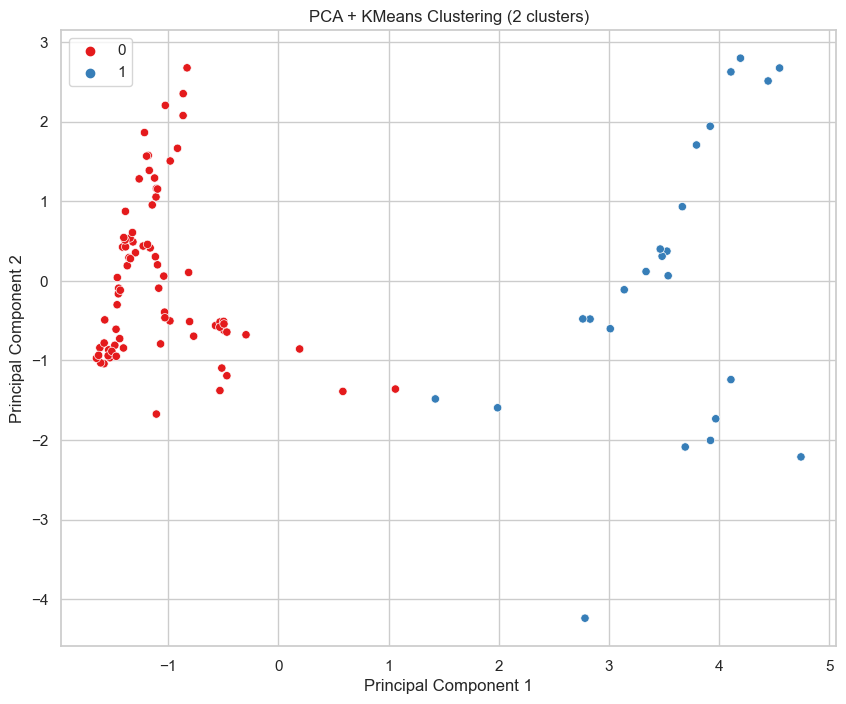

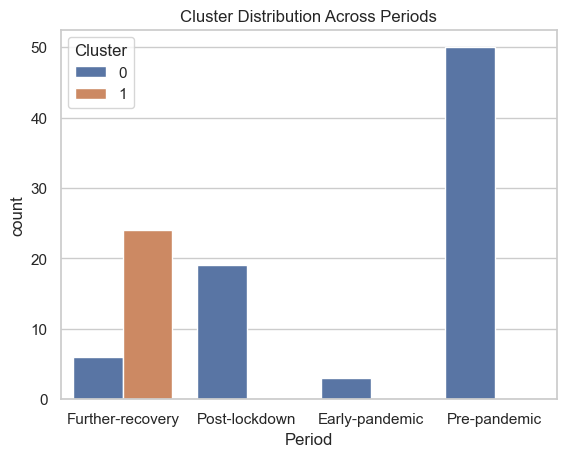

In [359]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# Selecting the relevant indicators for clustering
indicators = ['Non performing loan ratio', 'Inflation', 'Treasury bill rate (91-day)', 
              'Interbank weighted average rate', 'Interbank Exchange Rate US Dollar (USD)', 
              'Forex Bureau Exchange Rate US Dollar (USD)', 'Trading Volume', 'GSE Comp Index']

# Scaling the indicators to ensure they have equal weight in the analysis
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[indicators])

# Apply PCA for dimensionality reduction (we'll keep 2 components for visualization purposes)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# KMeans Clustering (Using 2 clusters as per the silhouette score analysis conducted earlier)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Add clusters back to the DataFrame
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='Set1')
plt.title('PCA + KMeans Clustering (2 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# To observe how these clusters align with the different periods (Pre, Early, Post, Further)
sns.countplot(x='Period', hue='Cluster', data=data)
plt.title('Cluster Distribution Across Periods')
plt.show()


The plot shows the results of a PCA (Principal Component Analysis) combined with KMeans Clustering for your data, where the optimal number of clusters (as per your analysis) is two. Here's a breakdown of what the plot reveals:

Axes Interpretation:
Principal Component 1 (x-axis) and Principal Component 2 (y-axis) are the new dimensions created by PCA. PCA reduces the dimensionality of your data while retaining most of the variation.
These components represent the most significant variance in the dataset, capturing essential patterns in a compressed format.
Cluster Groups:
Red dots (Cluster 0): One of the clusters identified by the KMeans algorithm.
Blue dots (Cluster 1): The other cluster.
Insights:
Cluster Separation: The plot indicates a clear separation between the two clusters. Most data points in Cluster 1 (blue) are concentrated on the right side of the plot, while Cluster 0 (red) occupies the left side.

Distinct Grouping: The data points in the blue cluster are more spread out across both principal components, whereas the red cluster shows a denser concentration, particularly along the second principal component axis.

Variance in Clusters: PCA helps in visualizing the variance between the clusters. Cluster 1 seems to represent more variation within the data (spread out along the first principal component), while Cluster 0 is more compact and exhibits less variance across both components.

Underlying Economic Patterns: Given the earlier financial indicator distributions, this clustering may be reflecting the economic behavior in different time periods or regions, where one cluster represents stability or lower economic change (possibly Pre-pandemic conditions), and the other shows higher variance, likely reflective of Post-lockdown or Further-recovery periods with greater market and economic changes.

The clustering aligns with your earlier expectation of group differences based on non-parametric insights, where significant shifts were observed during the different time periods.








This bar chart displays the cluster distribution across different periods in your analysis, showing how the data points are grouped into clusters (0 or 1) based on the time period.

Key Insights:
Pre-pandemic Period:

The majority of the data points in the Pre-pandemic period are classified under Cluster 0 (blue), indicating that the characteristics of this period are predominantly captured by this cluster.
Post-lockdown Period:

A substantial number of points in the Post-lockdown period are also classified under Cluster 0, which might indicate a return to more stable conditions that resemble the Pre-pandemic characteristics, even though some points reflect variability.
Further-recovery Period:

In the Further-recovery period, a significant number of data points are classified under Cluster 1 (orange). This could suggest that this period exhibits distinct economic or market conditions, likely driven by post-lockdown recovery factors, as previously observed in the violin plots showing increased variance.
Early-pandemic Period:

Only a small number of data points fall into the Early-pandemic period, all belonging to Cluster 0. This could indicate limited data points during this phase or that this period shares similarities with other Cluster 0 characteristics.
Conclusion:
The distribution of clusters across the periods aligns with the idea that Cluster 0 reflects more stable or pre-crisis-like conditions (dominant in Pre-pandemic and some Post-lockdown periods), whereas Cluster 1 corresponds to more recovery-driven or volatile conditions (dominant in the Further-recovery period). This further supports your expectation that the non-parametric insights and clustering analysis would converge in identifying different economic conditions across these time frames.